<a href="https://colab.research.google.com/github/grommitt/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/module1-join-and-reshape-data/LS_DS_121_Join_and_Reshape_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

## Download data

We’ll work with a dataset of [3 Million Instacart Orders, Open Sourced](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2)!

In [1]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2019-04-29 16:10:09--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.109.61
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.109.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  44.7MB/s    in 4.8s    

2019-04-29 16:10:14 (40.6 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [2]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [3]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [4]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


# Join Datasets

## Goal: Reproduce this example

The first two orders for user id 1:

In [5]:
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*vYGFQCafJtGBBX5mbl0xyw.png'
example = Image(url=url, width=600)

display(example)

## Load data

Here's a list of all six CSV filenames

In [6]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


For each CSV
- Load it with pandas
- Look at the dataframe's shape
- Look at its head (first rows)
- `display(example)`
- Which columns does it have in common with the example we want to reproduce?

### aisles

In [7]:
!head aisles.csv

aisle_id,aisle
1,prepared soups salads
2,specialty cheeses
3,energy granola bars
4,instant foods
5,marinades meat preparation
6,other
7,packaged meat
8,bakery desserts
9,pasta sauce


In [8]:
!wc aisles.csv

 135  311 2603 aisles.csv


In [0]:
import pandas as pd
aisles = pd.read_csv('aisles.csv')

In [10]:
aisles.shape

(134, 2)

In [11]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [12]:
display(example)

### departments

In [13]:
departments = pd.read_csv('departments.csv')
departments.shape

(21, 2)

In [14]:
departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


### order_products__prior

In [15]:
!ls -lh

total 681M
-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


In [16]:
!head order_products__prior.csv

order_id,product_id,add_to_cart_order,reordered
2,33120,1,1
2,28985,2,1
2,9327,3,0
2,45918,4,1
2,30035,5,0
2,17794,6,1
2,40141,7,1
2,1819,8,1
2,43668,9,0


In [19]:
order_products__prior = pd.read_csv('order_products__prior.csv')
order_products__prior.shape

(32434489, 4)

In [20]:
!free -m

              total        used        free      shared  buff/cache   available
Mem:          13022        3369        6454           0        3198       12358
Swap:             0           0           0


In [21]:
order_products__prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [22]:
order_products__prior.isna().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [23]:
order_products__prior.dtypes

order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtype: object

In [27]:
# groupby returns something similar to a dataframe
order_products__prior.groupby('order_id')['product_id'].count()

order_id
2           9
3           8
4          13
5          26
6           3
7           2
8           1
9          15
10         15
11          5
12         15
13         13
14         11
15          5
16          3
18         28
19          3
20          8
21          5
22         14
23         14
24          3
25         14
26          8
27         27
28         16
29          5
30          3
31         10
32          9
           ..
3421048     8
3421050    13
3421051    31
3421052     2
3421053     9
3421055    19
3421057     5
3421059     6
3421060    17
3421061    22
3421062     7
3421064     3
3421065     5
3421066     6
3421067     1
3421068    14
3421069    12
3421071     5
3421072    12
3421073     2
3421074     4
3421075     8
3421076     8
3421077     4
3421078     9
3421079     1
3421080     9
3421081     7
3421082     7
3421083    10
Name: product_id, Length: 3214874, dtype: int64

In [29]:
# people buy about 10 things on average
order_products__prior.groupby('order_id')['product_id'].count().mean()

10.088883421247614

In [30]:
display(example)

In [0]:
# what lives inside of here
dir(order_products__prior)

order_products__prior will help us figure our order id and product id columns but we still need more

### order_products__train

In [0]:
order_products__train = pd.read_csv('order_products__train.csv')

In [32]:
order_products__train.shape

(1384617, 4)

In [33]:
order_products__train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


order_products__train has the same columns as order_products__prior

### orders

In [0]:
orders = pd.read_csv('orders.csv')

In [37]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [38]:
orders.shape

(3421083, 7)

In [39]:
display(example)

orders data will give us:
- user id
- order number
- order dow/hour of day

order id/product id/cart order in prior. So at this point all we're missing is product name.

### products

In [41]:
products = pd.read_csv('products.csv')
products.shape

(49688, 4)

In [42]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


## Concatenate order_products__prior and order_products__train

In [43]:
order_products__prior.shape

(32434489, 4)

In [44]:
order_products__train.shape

(1384617, 4)

In [45]:
order_products = pd.concat([order_products__prior, order_products__train])
order_products.shape

(33819106, 4)

In [0]:
assert 1 == 1

In [47]:
assert 1 = 0

SyntaxError: ignored

In [0]:
assert len(order_products) == len(order_products__prior) + len(order_products__train)

In [49]:
help(pd.concat)

Help on function concat in module pandas.core.reshape.concat:

concat(objs, axis=0, join='outer', join_axes=None, ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, sort=None, copy=True)
    Concatenate pandas objects along a particular axis with optional set logic
    along the other axes.
    
    Can also add a layer of hierarchical indexing on the concatenation axis,
    which may be useful if the labels are the same (or overlapping) on
    the passed axis number.
    
    Parameters
    ----------
    objs : a sequence or mapping of Series, DataFrame, or Panel objects
        If a dict is passed, the sorted keys will be used as the `keys`
        argument, unless it is passed, in which case the values will be
        selected (see below). Any None objects will be dropped silently unless
        they are all None in which case a ValueError will be raised
    axis : {0/'index', 1/'columns'}, default 0
        The axis to concatenate along
    join : {'in

In [128]:
# checks for order_id 2539329
order_products['order_id'] == 10

0          False
1          False
2          False
3          False
4          False
5          False
6          False
7          False
8          False
9          False
10         False
11         False
12         False
13         False
14         False
15         False
16         False
17         False
18         False
19         False
20         False
21         False
22         False
23         False
24         False
25         False
26         False
27         False
28         False
29         False
           ...  
1384587    False
1384588    False
1384589    False
1384590    False
1384591    False
1384592    False
1384593    False
1384594    False
1384595    False
1384596    False
1384597    False
1384598    False
1384599    False
1384600    False
1384601    False
1384602    False
1384603    False
1384604    False
1384605    False
1384606    False
1384607    False
1384608    False
1384609    False
1384610    False
1384611    False
1384612    False
1384613    False
1384614    Fal

In [55]:
# finds data relevant to that order id
condition = order_products['order_id'] == 2539329
order_products[condition]

,order_id,product_id,add_to_cart_order,reordered
24076664,2539329,196,1,0
24076665,2539329,14084,2,0
24076666,2539329,12427,3,0
24076667,2539329,26088,4,0
24076668,2539329,26405,5,0


In [54]:
display(example)

## Get a subset of orders — the first two orders for user id 1

From `orders` dataframe:
- user_id
- order_id
- order_number
- order_dow
- order_hour_of_day

In [56]:
orders.shape

(3421083, 7)

In [57]:
orders[orders['user_id'] == 1]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [59]:
orders[orders['user_id'] == 1][orders['order_number'] <= 2]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0


In [61]:
condition = (orders['user_id'] == 1) & (orders['order_number'] <= 2)

columns = [ 'user_id',
           'order_id',
           'order_number',
           'order_dow',
           'order_hour_of_day' 
]

subset = orders.loc[condition, columns]
subset

,user_id,order_id,order_number,order_dow,order_hour_of_day
0,1,2539329,1,2,8
1,1,2398795,2,3,7


## Merge dataframes

Merge the subset from `orders` with columns from `order_products`

In [62]:
columns = ['order_id', 'add_to_cart_order', 'product_id']
order_products[columns].head()

,order_id,add_to_cart_order,product_id
0,2,1,33120
1,2,2,28985
2,2,3,9327
3,2,4,45918
4,2,5,30035


Merge with columns from `products`

In [69]:
merged = pd.merge(subset, order_products[columns], 
                  how='inner', on='order_id')
merged

,user_id,order_id,order_number,order_dow,order_hour_of_day,add_to_cart_order,product_id
0,1,2539329,1,2,8,1,196
1,1,2539329,1,2,8,2,14084
2,1,2539329,1,2,8,3,12427
3,1,2539329,1,2,8,4,26088
4,1,2539329,1,2,8,5,26405
5,1,2398795,2,3,7,1,196
6,1,2398795,2,3,7,2,10258
7,1,2398795,2,3,7,3,12427
8,1,2398795,2,3,7,4,13176
9,1,2398795,2,3,7,5,26088


In [70]:
s1 = {1, 2, 3}
s2 = {2, 3, 4}
# whats in both s2 and s2? 2 and 3
s1.intersection(s2)
# join

{2, 3}

In [71]:
merged = pd.merge(subset, order_products[columns],
                 how='inner', on='order_id')
merged

,user_id,order_id,order_number,order_dow,order_hour_of_day,add_to_cart_order,product_id
0,1,2539329,1,2,8,1,196
1,1,2539329,1,2,8,2,14084
2,1,2539329,1,2,8,3,12427
3,1,2539329,1,2,8,4,26088
4,1,2539329,1,2,8,5,26405
5,1,2398795,2,3,7,1,196
6,1,2398795,2,3,7,2,10258
7,1,2398795,2,3,7,3,12427
8,1,2398795,2,3,7,4,13176
9,1,2398795,2,3,7,5,26088


In [72]:
display(example)

In [73]:
subset.shape, order_products.shape, merged.shape

((2, 5), (33819106, 4), (11, 7))

In [74]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [75]:
final = pd.merge(merged, products[['product_id', 'product_name']],
                how='inner', on='product_id')
final

,user_id,order_id,order_number,order_dow,order_hour_of_day,add_to_cart_order,product_id,product_name
0,1,2539329,1,2,8,1,196,Soda
1,1,2398795,2,3,7,1,196,Soda
2,1,2539329,1,2,8,2,14084,Organic Unsweetened Vanilla Almond Milk
3,1,2539329,1,2,8,3,12427,Original Beef Jerky
4,1,2398795,2,3,7,3,12427,Original Beef Jerky
5,1,2539329,1,2,8,4,26088,Aged White Cheddar Popcorn
6,1,2398795,2,3,7,5,26088,Aged White Cheddar Popcorn
7,1,2539329,1,2,8,5,26405,XL Pick-A-Size Paper Towel Rolls
8,1,2398795,2,3,7,2,10258,Pistachios
9,1,2398795,2,3,7,4,13176,Bag of Organic Bananas


In [76]:
display(example)

In [77]:
final = final.sort_values(by=['order_number', 'add_to_cart_order'])
final.columns = [column.replace('_', ' ') for column in final]
final

,user id,order id,order number,order dow,order hour of day,add to cart order,product id,product name
0,1,2539329,1,2,8,1,196,Soda
2,1,2539329,1,2,8,2,14084,Organic Unsweetened Vanilla Almond Milk
3,1,2539329,1,2,8,3,12427,Original Beef Jerky
5,1,2539329,1,2,8,4,26088,Aged White Cheddar Popcorn
7,1,2539329,1,2,8,5,26405,XL Pick-A-Size Paper Towel Rolls
1,1,2398795,2,3,7,1,196,Soda
8,1,2398795,2,3,7,2,10258,Pistachios
4,1,2398795,2,3,7,3,12427,Original Beef Jerky
9,1,2398795,2,3,7,4,13176,Bag of Organic Bananas
6,1,2398795,2,3,7,5,26088,Aged White Cheddar Popcorn


# Reshape Datasets

## Why reshape data?

#### Some libraries prefer data in different formats

For example, the Seaborn data visualization library prefers data in "Tidy" format often (but not always).

> "[Seaborn will be most powerful when your datasets have a particular organization.](https://seaborn.pydata.org/introduction.html#organizing-datasets) This format ia alternately called “long-form” or “tidy” data and is described in detail by Hadley Wickham. The rules can be simply stated:

> - Each variable is a column
- Each observation is a row

> A helpful mindset for determining whether your data are tidy is to think backwards from the plot you want to draw. From this perspective, a “variable” is something that will be assigned a role in the plot."

#### Data science is often about putting square pegs in round holes

Here's an inspiring [video clip from _Apollo 13_](https://www.youtube.com/watch?v=ry55--J4_VQ): “Invent a way to put a square peg in a round hole.” It's a good metaphor for data wrangling!

## Hadley Wickham's Examples

From his paper, [Tidy Data](http://vita.had.co.nz/papers/tidy-data.html)

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

"Table 1 provides some data about an imaginary experiment in a format commonly seen in the wild. 

The table has two columns and three rows, and both rows and columns are labelled."

In [79]:
table1

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


"There are many ways to structure the same underlying data. 

Table 2 shows the same data as Table 1, but the rows and columns have been transposed. The data is the same, but the layout is different."

In [80]:
table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


"Table 3 reorganises Table 1 to make the values, variables and obserations more clear.

Table 3 is the tidy version of Table 1. Each row represents an observation, the result of one treatment on one person, and each column is a variable."

| name         | trt | result |
|--------------|-----|--------|
| John Smith   | a   | -      |
| Jane Doe     | a   | 16     |
| Mary Johnson | a   | 3      |
| John Smith   | b   | 2      |
| Jane Doe     | b   | 11     |
| Mary Johnson | b   | 1      |

## Table 1 --> Tidy

We can use the pandas `melt` function to reshape Table 1 into Tidy format.

In [81]:
table1.columns.tolist()

['treatmenta', 'treatmentb']

In [82]:
table1.index.tolist()

['John Smith', 'Jane Doe', 'Mary Johnson']

In [83]:
tidy = table1.reset_index().melt(id_vars='index')

tidy = tidy.rename(columns={
    'index': 'name',
    'variable' : 'trt',
    'value' : 'result'
})

tidy['trt'] = tidy['trt'].str.replace('treatment', '')

tidy.set_index('name')

,trt,result
name,,
John Smith,a,NaN
Jane Doe,a,16.0
Mary Johnson,a,3.0
John Smith,b,2.0
Jane Doe,b,11.0
Mary Johnson,b,1.0


https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html

In [84]:
# we can replace values in a dataframe
tidy['trt'].replace('a', 0).replace('b', 1)

0    0
1    0
2    0
3    1
4    1
5    1
Name: trt, dtype: int64

In [85]:
# can also do this with a mapping dictionary
tidy['trt'].map({'a':0, 'b':1})

0    0
1    0
2    0
3    1
4    1
5    1
Name: trt, dtype: int64

In [86]:
# can also use astype
(tidy['trt'] == 'b').astype(int)

0    0
1    0
2    0
3    1
4    1
5    1
Name: trt, dtype: int64

In [87]:
# or can use a lambda
tidy['trt'].apply(lambda x: ord(x) - ord('a'))

0    0
1    0
2    0
3    1
4    1
5    1
Name: trt, dtype: int64

## Table 2 --> Tidy

In [0]:
##### LEAVE BLANK --an assignment exercise #####

## Tidy --> Table 1

The `pivot_table` function is the inverse of `melt`.

In [88]:
table1

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


In [89]:
tidy

,name,trt,result
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,1.0


In [90]:
tidy.pivot_table(index='name', columns='trt', values='result')

trt,a,b
name,,
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Mary Johnson,3.0,1.0


## Tidy --> Table 2

In [0]:
##### LEAVE BLANK --an assignment exercise #####

# Seaborn example

The rules can be simply stated:

- Each variable is a column
- Each observation is a row

A helpful mindset for determining whether your data are tidy is to think backwards from the plot you want to draw. From this perspective, a “variable” is something that will be assigned a role in the plot."

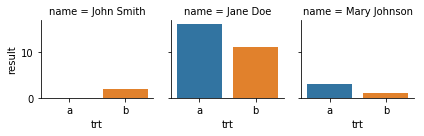

In [91]:
sns.catplot(x='trt', y='result', col='name', 
            kind='bar', data=tidy, height=2);

## Now with Instacart data

In [0]:
products = pd.read_csv('products.csv')

order_products = pd.concat([pd.read_csv('order_products__prior.csv'), 
                            pd.read_csv('order_products__train.csv')])

orders = pd.read_csv('orders.csv')

## Goal: Reproduce part of this example

Instead of a plot with 50 products, we'll just do two — the first products from each list
- Half And Half Ultra Pasteurized
- Half Baked Frozen Yogurt

In [93]:
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*wKfV6OV-_1Ipwrl7AjjSuw.png'
example = Image(url=url, width=600)

display(example)

So, given a `product_name` we need to calculate its `order_hour_of_day` pattern.

## Subset and Merge

One challenge of performing a merge on this data is that the `products` and `orders` datasets do not have any common columns that we can merge on. Due to this we will have to use the `order_products` dataset to provide the columns that we will use to perform the merge.

In [0]:
product_names = ['Half Bakes Frozen Yogurt', 'Half and Half Ultra Pasteurized']

In [95]:
products.columns.tolist()

['product_id', 'product_name', 'aisle_id', 'department_id']

In [96]:
orders.columns.tolist()

['order_id',
 'user_id',
 'eval_set',
 'order_number',
 'order_dow',
 'order_hour_of_day',
 'days_since_prior_order']

In [97]:
order_products.columns.tolist()

['order_id', 'product_id', 'add_to_cart_order', 'reordered']

In [0]:
merged = (products[['product_id', 'product_name']]
         .merge(order_products[['order_id', 'product_id']])
         .merge(orders[['order_id', 'order_hour_of_day']]))

In [99]:
products.shape, order_products.shape, orders.shape, merged.shape

((49688, 4), (33819106, 4), (3421083, 7), (33819106, 4))

In [0]:
merged.head()

In [0]:
# what condition will filter `merged` to just the 2 products
# that we care about?

# this is equivalent ...

condition = ((merged['product_name']=='Half Baked Frozen Yogurt') |
             (merged['product_name']=='Half And Half Ultra Pasteurized'))

# ... to this:

product_names = ['Half Baked Frozen Yogurt', 'Half And Half Ultra Pasteurized']

condition = merged['product_name'].isin(product_names)

subset = merged[condition]
subset.sample(n=5)

In [104]:
subset.shape

(5978, 4)

## 4 ways to reshape and plot

### 1. value_counts

In [0]:
froyo = subset[subset['product_name']=='Half Baked Frozen Yogurt']
cream = subset[subset['product_name']=='Half And Half Ultra Pasteurized']

In [0]:
(cream['order_hour_of_day']
 .value_counts(normalize=True)
 .sort_index()
 .plot())

(froyo['order_hour_of_day']
 .value_counts(normalize=True)
 .sort_index()
 .plot());

### 2. crosstab

In [0]:
pd.crosstab(subset['order_hour_of_day'],
           subset['product_name'])

In [0]:
(pd.crosstab(subset['order_hour_of_day'],
            subset['product_name'],
            normalize='columns') * 100).plot();

### 3. Pivot Table

In [0]:
subset.pivot_table(index='order_hour_of_day',
                  columns='product_name',
                  values='order_id',
                  aggfunc=len).plot();

### 4. melt

In [0]:
table = pd.crosstab(subset['order_hour_of_day'],
                   subset['product_name'],
                   normalize=True)

melted = (table
         .reset_index()
         .melt(id_vars='order_hour_of_day')
         .rename(columns={
             'order_hour_of_day': 'Hour of Day Ordered',
             'product_name': 'Product',
             'value': 'Percent of Orders by Product'
         }))

sns.relplot(x='Hour of Day Ordered',
          y='Percent of Orders by Product',
          hue='Product',
          data=melted,
          kind='line');

In [0]:
display(example)

# Assignment

## Join Data Section

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

In [121]:
url = 'https://cdn-images-1.medium.com/max/1600/1*vYGFQCafJtGBBX5mbl0xyw.png'
example = Image(url=url, width=600)

display(example)

In [0]:
products = pd.read_csv('products.csv')

order_products = pd.concat([pd.read_csv('order_products__prior.csv'), 
                            pd.read_csv('order_products__train.csv')])

orders = pd.read_csv('orders.csv')

In [124]:
products.columns.tolist()

['product_id', 'product_name', 'aisle_id', 'department_id']

In [125]:
orders.columns.tolist()

['order_id',
 'user_id',
 'eval_set',
 'order_number',
 'order_dow',
 'order_hour_of_day',
 'days_since_prior_order']

In [126]:
order_products.columns.tolist()

['order_id', 'product_id', 'add_to_cart_order', 'reordered']

In [0]:
merged = (products[['product_id', 'product_name']]
         .merge(order_products[['order_id', 'product_id']])
         .merge(orders[['order_id', 'order_number']]))
merged.head(50)

In [130]:
# Banana
# 491,291
merged[merged['product_name'] == 'Banana'].count()

product_id      491291
product_name    491291
order_id        491291
order_number    491291
dtype: int64

In [132]:
# Bag of Organic Bananas
# 394,930
merged[merged['product_name'] == 'Bag of Organic Bananas'].count()

product_id      394930
product_name    394930
order_id        394930
order_number    394930
dtype: int64

In [133]:
# Organic Strawberries
# 275,577
merged[merged['product_name'] == 'Organic Strawberries'].count()

product_id      275577
product_name    275577
order_id        275577
order_number    275577
dtype: int64

In [134]:
# Organic Baby Spinach
# 251,705
merged[merged['product_name'] == 'Organic Baby Spinach'].count()

product_id      251705
product_name    251705
order_id        251705
order_number    251705
dtype: int64

In [135]:
# Organic Hass Avocado
# 220,877
merged[merged['product_name'] == 'Organic Hass Avocado'].count()

product_id      220877
product_name    220877
order_id        220877
order_number    220877
dtype: int64

In [137]:
# Organic Avocado
# 184,224
merged[merged['product_name'] == 'Organic Avocado'].count()

product_id      184224
product_name    184224
order_id        184224
order_number    184224
dtype: int64

In [139]:
# Large Lemon
# 160,792
merged[merged['product_name'] == 'Large Lemon'].count()

product_id      160792
product_name    160792
order_id        160792
order_number    160792
dtype: int64

In [140]:
# Strawberries
# 149,445
merged[merged['product_name'] == 'Strawberries'].count()

product_id      149445
product_name    149445
order_id        149445
order_number    149445
dtype: int64

In [141]:
# Limes
# 146,660
merged[merged['product_name'] == 'Limes'].count()

product_id      146660
product_name    146660
order_id        146660
order_number    146660
dtype: int64

In [142]:
# Organic Whole Milk
# 142,813
merged[merged['product_name'] == 'Organic Whole Milk'].count()

product_id      142813
product_name    142813
order_id        142813
order_number    142813
dtype: int64



## Reshape Data Section

- Replicate the lesson code
- Complete the code cells we skipped near the beginning of the notebook
- Table 2 --> Tidy
- Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

## Table 2 --> Tidy

In [146]:
table1

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


In [143]:
table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [145]:
table2.columns.tolist()

['John Smith', 'Jane Doe', 'Mary Johnson']

In [147]:
table2.index.tolist()

['treatmenta', 'treatmentb']

In [148]:
tidy = table2.reset_index().melt(id_vars='index')

tidy = tidy.rename(columns={
    'index': 'trt',
    'variable': 'name',
    'value': 'result'
})

tidy['trt'] = tidy['trt'].str.replace('treatment', '')
tidy.set_index('trt')

,name,result
trt,,
a,John Smith,NaN
b,John Smith,2.0
a,Jane Doe,16.0
b,Jane Doe,11.0
a,Mary Johnson,3.0
b,Mary Johnson,1.0


## Tidy --> Table 2

In [149]:
table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [150]:
tidy

,trt,name,result
0,a,John Smith,NaN
1,b,John Smith,2.0
2,a,Jane Doe,16.0
3,b,Jane Doe,11.0
4,a,Mary Johnson,3.0
5,b,Mary Johnson,1.0


In [151]:
tidy.pivot_table(index='trt', columns='name', values='result')

name,Jane Doe,John Smith,Mary Johnson
trt,,,
a,16.0,NaN,3.0
b,11.0,2.0,1.0


Load seaborn's flights dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [0]:
flights = sns.load_dataset('flights')

In [157]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [158]:
flights.pivot_table(index='year', columns='month', values='passengers')

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


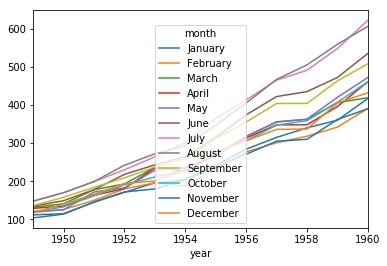

In [159]:
flights.pivot_table(index='year', columns='month', values='passengers').plot();

## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.

## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)